In [117]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

In [118]:
def rgb_to_hsv(rgb):
  # Input: rgb is an 3-D array with values in range [0,255].
  # r = rgb[0][0][0], b = rgb[0][0][1], g = rgb[0][0][2]
  # Output: hsv is an 1-D array [h,s,v] with values in range h = [0,180], s = [0,255], v = [0,255].
  # Normalize color values. Convert to floating point values between 0 - 1


    rgb=np.array(rgb)/255
    
    # Initialize HSV
    h = 0.0
    s = 0.0
    v = 0.0
    # to find the max and min RGB values and set the V 
    v = np.max(rgb)
    vMin = np.min(rgb)
    # Set the saturation value.
    if(v>0.0):
      s = (v - vMin)/v
    else:
      s = 0.0
    # Calculate (v - vMin) convenience
    diff = (v - vMin)
    # Compute the hue by the relative sizes of the RGB components

    # Are r,g,b equal.
    if(rgb[0][0][0] == rgb[0][0][1] and rgb[0][0][1] == rgb[0][0][2]):
      h = 0
    # Is the point within +/- 60 degrees of the red axis
    elif(rgb[0][0][0] == v):
      h = 60 * (rgb[0][0][1] - rgb[0][0][2]) / diff
    # Is the point within +/- 60 degrees of the green axis
    elif(rgb[0][0][1] == v):
      h = 120 + 60 * (rgb[0][0][2] - rgb[0][0][0]) / diff
    # IS the point within +/- 60 degrees of the blue axis
    elif(rgb[0][0][2] == v):
      h = 240 + 60 * (rgb[0][0][0] - rgb[0][0][1]) / diff

    h=round(h/2)
    #Normalize color values. Convert to floating point values between 0 - 255
    s = np.interp(s,[0,1],[0,255])
    v = np.interp(v,[0,1],[0,255])
    return np.array([[[round(h),round(s),round(v)]]])

In [119]:
def rgb_to_hsv_pixel(img):
    #Height of image array
    h = img.shape[0]
    #width of image array
    w = img.shape[1]
    #channel of of image array
    d = img.shape[2]

    imghsv = np.zeros((h,w,d), dtype=np.uint8)

    #For each row in our grid.
    for y in range(0,h):
        #Search each pixel in the row
        for x in range(0,w):
            #Reshaping 1D to 3D and send it to the rgb_to_hsv function
            imghsv[y][x]=rgb_to_hsv([[img[y][x]]])
    return imghsv
       


In [120]:
def bgr_to_rgb_pixel(img):
   #Height of image array
    h = img.shape[0]
    #width of image array
    w = img.shape[1]
    #channel of of image array
    d = img.shape[2]

    imgrgb = np.zeros((h,w,d), dtype=np.uint8)
    #For each row in our grid.
    for y in range(0,h):
        #Search each pixel in the row
        for x in range(0,w):
            #Swapping red channel to blue and blue to red
            imgrgb[y][x][0]=img[y][x][2]
            imgrgb[y][x][1]=img[y][x][1]
            imgrgb[y][x][2]=img[y][x][0]
    return imgrgb

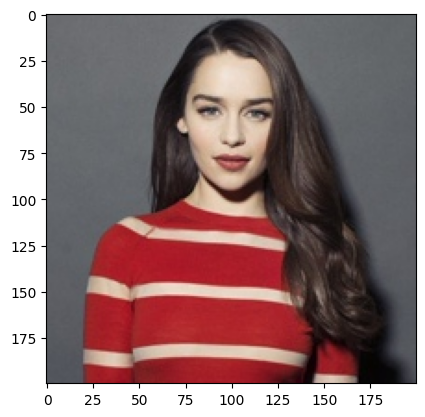

In [121]:
# Import Image
img = cv2.imread('emmy.jpg')
#converting the image from bgr to rgb 
img = bgr_to_rgb_pixel(img)
#printing
plt.imshow(img)

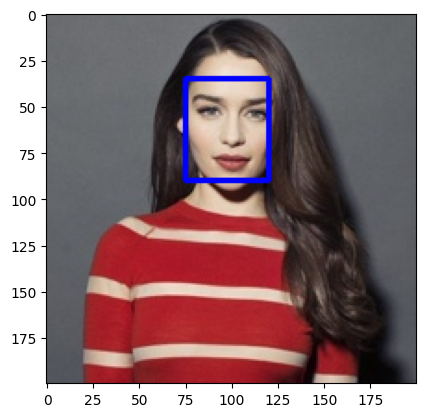

In [122]:
# Import Image
img = cv2.imread('emmy.jpg')
#top left
top_left=(75,35)
#bottom right
bottom_right=(120,90)

#color of rectangle
rect_color =(255,0,0)
#thickness
thickness=2
# Apply rectangle.
img_rect=cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)
# Convert back to RGB
img_rect=bgr_to_rgb_pixel(img_rect)
# Plot image.
plt.imshow(img_rect)

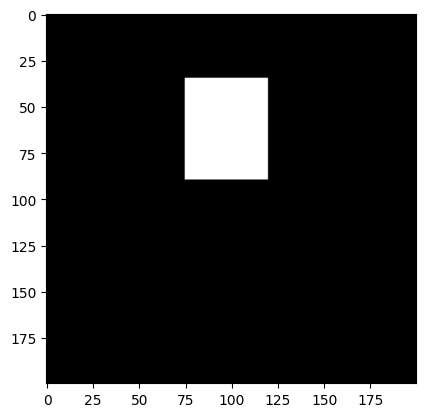

In [123]:
#create mask
mask= np.zeros(img.shape[:2], np.uint8)

#add white portion of the mask
mask[35:90, 75:120]=255

# Plot mask.
plt.imshow(mask, cmap="gray")

#img_masked = cv2.bitwise_and(img, img, mask=mask)
#plt.imshow(img_masked)

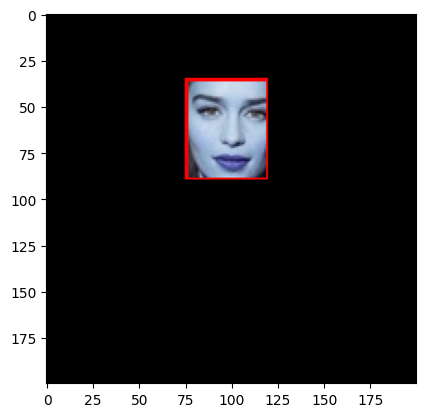

In [124]:
img_masked = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(img_masked)

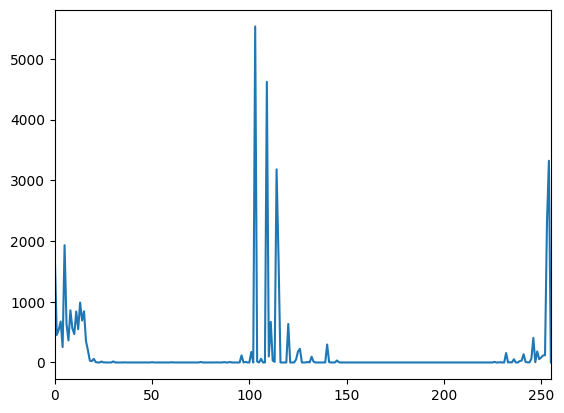

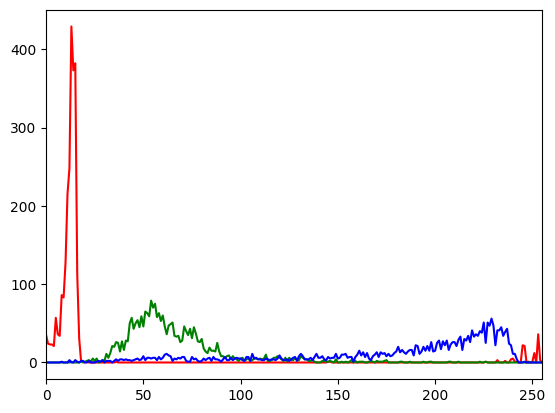

In [125]:
# Reimport image
img = cv2.imread("emmy.jpg")

img = bgr_to_rgb_pixel(img)
img = rgb_to_hsv_pixel(img)

hist_full = cv2.calcHist([img],[0],None,[256],[0,255])
# Plot
plt.plot(hist_full)
# Limit range
plt.xlim([0,255])
# Show plot
plt.show()
# adding the mask we created with the rectangle mask 
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,255])
plt.plot(hist_mask, color="red")
plt.xlim([0,255])

hist_mask = cv2.calcHist([img],[1],mask,[256],[0,255])
plt.plot(hist_mask, color="green")
plt.xlim([0,255])

hist_mask = cv2.calcHist([img],[2],mask,[256],[0,255])
plt.plot(hist_mask, color="blue")
plt.xlim([0,255])

# Show plot
plt.show()

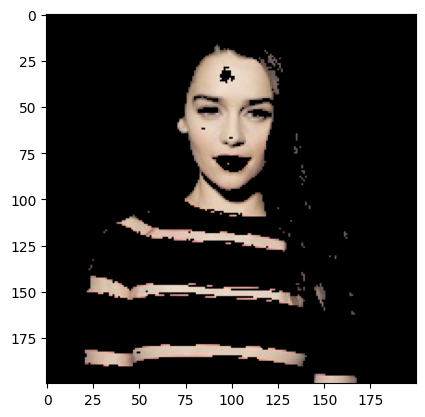

In [126]:
# Minimum and maximum HSV values.
min_HSV = np.array([0,30,100], np.uint8)
max_HSV = np.array([25,100,240], np.uint8)

# cv2.inRange(image, minimum, maximum)
skinArea = cv2.inRange(img, min_HSV, max_HSV)

# Bitwise And mask
skinHSV = cv2.bitwise_and(img, img, mask=skinArea)

# Convert to RGB
skinHSV = cv2.cvtColor(skinHSV, cv2.COLOR_HSV2RGB)

# Plot masked image.
plt.imshow(skinHSV)